In [1]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo
!mkdir ./images

     |████████████████████████████████| 773.1MB 33kB/s 
     |████████████████████████████████| 10.1MB 31.1MB/s 
  Found existing installation: torch 1.2.0
    Uninstalling torch-1.2.0:
      Successfully uninstalled torch-1.2.0
  Found existing installation: torchvision 0.4.0
    Uninstalling torchvision-0.4.0:
      Successfully uninstalled torchvision-0.4.0
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-4vdfmo6w
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-4vdfmo6w
     |████████████████████████████████| 266kB 5.1MB/s 
  Created wheel for fvcore: filename=fvcore-0.1-cp36-none-any.whl size=46446 sha256=c1969085720a1b5c7022c1dc69569628e378791136094cddfe2aa394167b651c
  Stored in directory: /tmp/pip-ephem-wheel-cache-b2uci1bj/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp36-cp36m-linux_x86_64.whl size=44104 sha256=a5beca9b1d9f56f8d

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import urllib, os, cv2, random
from matplotlib import patches
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

import torch, torchvision
from detectron2.utils.logger import setup_logger
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.modeling import build_model

setup_logger()

<Logger detectron2 (DEBUG)>

In [2]:
dataframe = pd.read_json('./Indian_Number_plates.json', lines = True)
dataframe.head()

,annotation,content,extras,metadata
0,"[{'label': ['number_plate'], 'notes': '', 'poi...",http://com.dataturks.a96-i23.open.s3.amazonaws...,NaN,"{'first_done_at': 1530954577000, 'last_updated..."
1,"[{'label': ['number_plate'], 'notes': '', 'poi...",http://com.dataturks.a96-i23.open.s3.amazonaws...,NaN,"{'first_done_at': 1530954866000, 'last_updated..."
2,"[{'label': ['number_plate'], 'notes': '', 'poi...",http://com.dataturks.a96-i23.open.s3.amazonaws...,NaN,"{'first_done_at': 1530971844000, 'last_updated..."
3,"[{'label': ['number_plate'], 'notes': '', 'poi...",http://com.dataturks.a96-i23.open.s3.amazonaws...,NaN,"{'first_done_at': 1530971917000, 'last_updated..."
4,"[{'label': ['number_plate'], 'notes': '', 'poi...",http://com.dataturks.a96-i23.open.s3.amazonaws...,NaN,"{'first_done_at': 1530955094000, 'last_updated..."


In [3]:
train_dataframe, val_dataframe = train_test_split(dataframe, test_size = 0.1)
train_dataframe.shape, val_dataframe.shape

((284, 4), (32, 4))

In [0]:
try:
    os.makedirs('./images')
except:
    pass

In [0]:
def get_dataset_dicts(dataframe):
    file_names, dataset_dicts = [], []
    for index, row in tqdm(dataframe.iterrows()):
        objs = []
        record = {}
        image = Image.open(urllib.request.urlopen(row["content"])).convert('RGB')
        filename = './images/' + row["content"].split('/')[-1]
        file_names.append(filename)
        image.save('./images/' + row["content"].split('/')[-1])
        height = row['annotation'][0]['imageHeight']
        width = row['annotation'][0]['imageWidth']
        x_min = row['annotation'][0]['points'][0]['x'] * width
        x_max = row['annotation'][0]['points'][1]['x'] * width
        y_min = row['annotation'][0]['points'][0]['y'] * height
        y_max = row['annotation'][0]['points'][1]['y'] * height
        record['file_name'] = filename
        record['height'] = height
        record['width'] = width
        record['annotations'] = [{
            "bbox": [x_min, y_min, x_max, y_max],
            "bbox_mode": BoxMode.XYXY_ABS,
            "category_id": 0,
            "iscrowd": 0
        }]
        dataset_dicts.append(record)
    dataframe['content'] = file_names
    return dataset_dicts, dataframe, file_names

In [6]:
train_dataset_dicts, train_dataframe, train_file_names = get_dataset_dicts(train_dataframe)
val_dataset_dicts, val_dataframe, val_file_names = get_dataset_dicts(val_dataframe)
dataset_dicts = train_dataset_dicts + val_dataset_dicts
dataframe['content'] = train_file_names + val_file_names
dataset_dicts

284it [00:56,  5.07it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
32it [00:06,  4.75it/s]


[{'annotations': [{'bbox': [12.0, 66.0, 249.0, 199.0],
    'bbox_mode': <BoxMode.XYXY_ABS: 0>,
    'category_id': 0,
    'iscrowd': 0}],
  'file_name': './images/304b14b8-dc3c-41cb-94b6-635864e2e964___number-plate-protector-car-safeplate-250x250.jpg.jpeg',
  'height': 250,
  'width': 250},
 {'annotations': [{'bbox': [135.0,
     117.99999999999991,
     320.0,
     196.99999999999983],
    'bbox_mode': <BoxMode.XYXY_ABS: 0>,
    'category_id': 0,
    'iscrowd': 0}],
  'file_name': './images/a95a0d9d-5d40-4abb-bd3e-6c6d94bef5b1___IMG_3310.jpg.jpeg',
  'height': 300,
  'width': 400},
 {'annotations': [{'bbox': [92.99999999999967,
     331.9999999999997,
     297.9999999999998,
     405.99999999999994],
    'bbox_mode': <BoxMode.XYXY_ABS: 0>,
    'category_id': 0,
    'iscrowd': 0}],
  'file_name': './images/fbc107b7-13d8-4a2d-b8be-7c96bd7d609c___new_9214a754343030395508e104d7948167_large.jpg.jpeg',
  'height': 450,
  'width': 429},
 {'annotations': [{'bbox': [150.99999999999966,
     353

In [7]:
# Register License Plate Dataset
for d in ["train", "val"]:
    if d == 'train':
        DatasetCatalog.register("license_plate/" + d, lambda d = d: train_dataset_dicts)
    else:
        DatasetCatalog.register("hand/" + d, lambda d = d: val_dataset_dicts)
    MetadataCatalog.get("license_plate/" + d).set(thing_classes = ["license_plate"])
license_plate_metadata = MetadataCatalog.get("license_plate/train")
license_plate_metadata

Metadata(name='license_plate/train', thing_classes=['license_plate'])

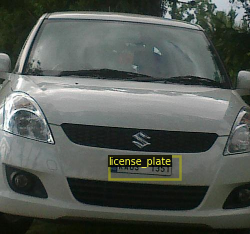

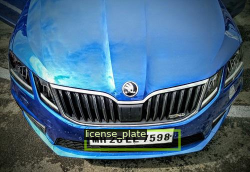

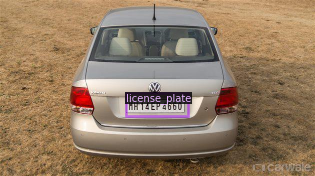

In [8]:
# Visualize Dataset
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata = license_plate_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [9]:
cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
cfg.DATASETS.TRAIN = ("license_plate/train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_C4_3x/137849393/model_final_f97cb7.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 200
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

WARNING [10/13 01:19:59 d2.config.compat]: Config './detectron2_repo/configs/COCO-Detection/faster_rcnn_R_50_C4_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [10]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok = True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume = False)

[10/13 01:20:02 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

'roi_heads.box_predictor.cls_score.weight' has shape (81, 2048) in the checkpoint but (2, 2048) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (2,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 2048) in the checkpoint but (4, 2048) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (4,) in the model! Skipped.


In [11]:
trainer.train()

[10/13 01:20:04 d2.engine.train_loop]: Starting training from iteration 0
[10/13 01:20:31 d2.utils.events]: eta: 0:04:00  iter: 19  total_loss: 1.206  loss_cls: 0.808  loss_box_reg: 0.192  loss_rpn_cls: 0.232  loss_rpn_loc: 0.026  time: 1.3326  data_time: 0.0041  lr: 0.000050  max_mem: 2123M
[10/13 01:20:57 d2.utils.events]: eta: 0:03:34  iter: 39  total_loss: 0.764  loss_cls: 0.299  loss_box_reg: 0.236  loss_rpn_cls: 0.206  loss_rpn_loc: 0.022  time: 1.3282  data_time: 0.0039  lr: 0.000100  max_mem: 2123M
[10/13 01:21:25 d2.utils.events]: eta: 0:03:09  iter: 59  total_loss: 0.722  loss_cls: 0.246  loss_box_reg: 0.282  loss_rpn_cls: 0.165  loss_rpn_loc: 0.035  time: 1.3404  data_time: 0.0045  lr: 0.000150  max_mem: 2123M
[10/13 01:21:52 d2.utils.events]: eta: 0:02:43  iter: 79  total_loss: 0.520  loss_cls: 0.162  loss_box_reg: 0.256  loss_rpn_cls: 0.102  loss_rpn_loc: 0.013  time: 1.3505  data_time: 0.0043  lr: 0.000200  max_mem: 2123M
[10/13 01:22:19 d2.utils.events]: eta: 0:02:16  it

OrderedDict()

In [0]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.92   # set the testing threshold for this model
cfg.DATASETS.TEST = ("license_plate_val", )
predictor = DefaultPredictor(cfg)

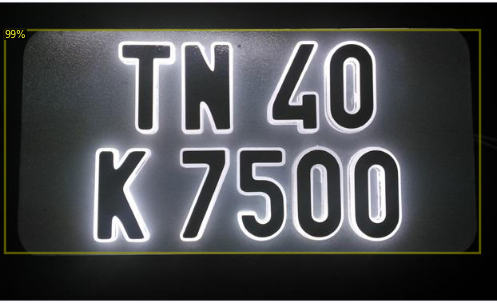

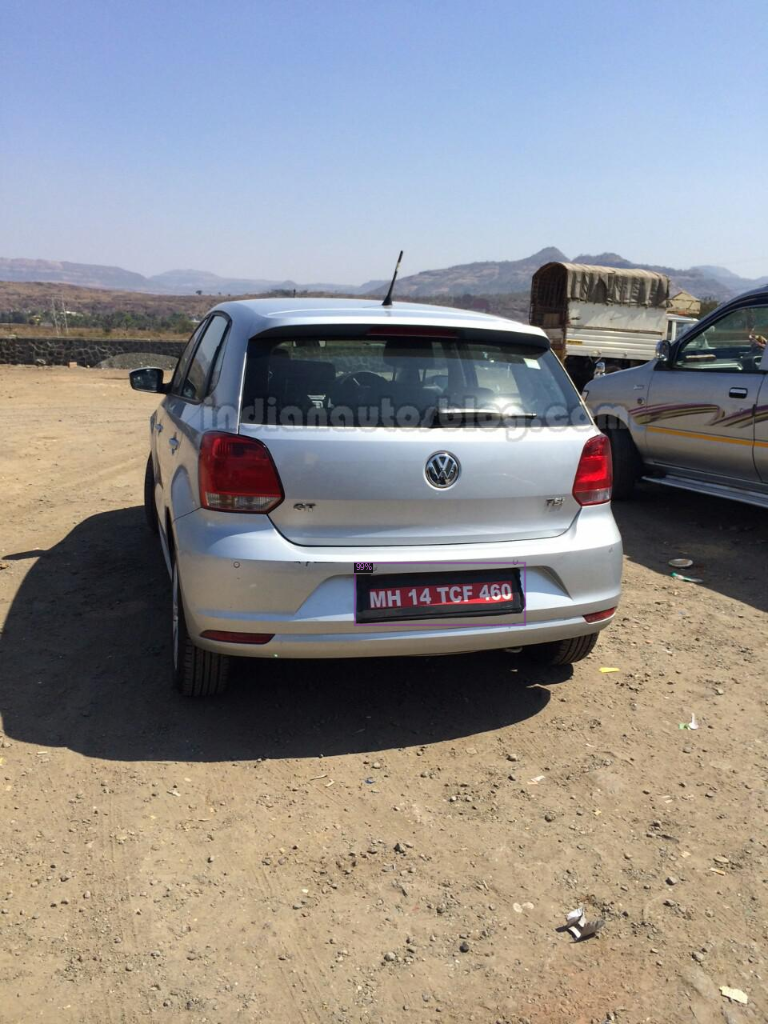

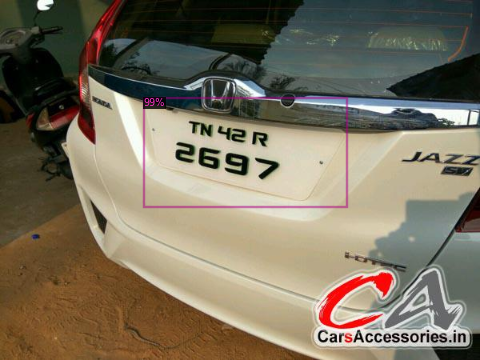

In [25]:
# Inference on Validation Set

from detectron2.utils.visualizer import ColorMode
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    # print(outputs)
    v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get("hand_val"), 
                   scale=0.8
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])